#### Université Paul Sabatier, M2MAPI3
# Big data - practical 1: perceptron and SVM
# Dani Halegua et Luca Champesting
We advise to use [matplotlib](https://matplotlib.org/) for plots and [numpy](https://numpy.org/). The online documentation contains information regarding the use of these libraries how to use these libraries.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
import math as math
import numpy as np
import numpy.random as npr

## Exercice 1: estimation of the mean of a univariate random variable

Let $x_1,\ldots,x_n$ be a real numbers, their mean is given by
$$\bar{x} = \arg\min_y f(y) $$
Where 
$$f \colon y \mapsto \frac{1}{n} \sum_{i=1}^n (y-x_i)^2$$
The following code generates input data and plots f. 

**Question 0:** what are the inputs? what is the argmin? what is the min?

**Answer :** Les inputs sont les nombres $x_i$.
L'argmin est la moyenne empirique des nombres $x_{i}$. Le minimum est $\frac{1}{n} \sum_{i=1}^n (\bar x-x_i)^2$, c'est à dire la variance de x .

Empirical mean:
5.5


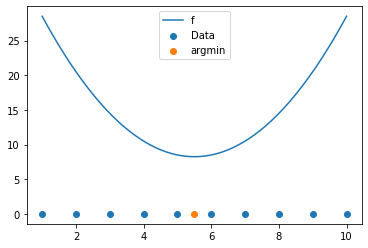

In [84]:
n = 10
x = np.linspace(1,10,10)
print("Empirical mean:")
print(np.mean(x))

plt.scatter(x, np.zeros(10), label = "Data")
plt.scatter(5.5, 0, label = "argmin")
y = np.linspace(10,100,100)/10
#print("f = ", y**2 - 2 * np.mean(x) * y + np.mean(x**2))
plt.plot(y, y**2 - 2 * np.mean(x) * y + np.mean(x**2), label = "f")
plt.legend()

**Question 1:** Implement the gradient descent algorithm on $f$ with $y_0 = 2$ and stepsize equal to $1/3$.
\begin{align*}
    y_{k+1} &= y_k - f'(y_k) / 3
\end{align*}
We set $f_k = f(y_k)$ for each $k$. Plot $f_k - f^*$ in logarithmic scale as a function of $k$. Plot the value of $|y_k - y^*|$, where $y^*$ is the argmin, as a function of $k$ in logarithmic scale. What can you say about these results? 

**Answer :** On peut dire que la convergence est linéaire, on observe une droite en echelle logarithmique. La descente de gradient est un algorithme de minimisation efficace.

<ipython-input-6-cee7396d0628>:32: RuntimeWarning: divide by zero encountered in log
  plt.plot(k, np.log(f_yk-f_star), label = " Gradient descent  1/3")


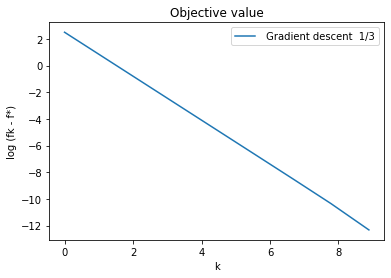

<ipython-input-6-cee7396d0628>:39: RuntimeWarning: divide by zero encountered in log
  plt.plot(k, np.log(abs(y_star-lst_yk)), label = "Gradient descent 1/3")


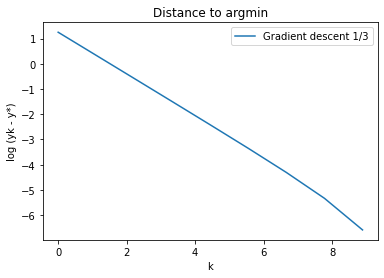

In [6]:
x = np.linspace(1,10,10)
def f(y):
    return y**2 - 2 * np.mean(x) * y + np.mean(x**2)

def f_prime(y):
    return 2 *  np.mean(y - x)

def grad_descent(learning_rate, y0, nbIter) :
    yk=y0
    f_yk = np.zeros(nbIter)
    f_yk[0] = f(yk)
    lst_yk = np.zeros(nbIter)
    lst_yk[0]=yk
    
    for k in range(1, nbIter): 
        yk2 = yk - learning_rate  * f_prime(yk)
        f_yk[k]=f(yk2)
        lst_yk[k]=yk2
        yk = yk2
    y_star = lst_yk[-1]
    return y_star, lst_yk, f_yk
        
    
k = np.linspace(0,10,10)
y_star, lst_yk, f_yk = grad_descent(.3,2,10)
f_star = f(y_star)



#print("f_star = ", f_star)
plt.title("Objective value")
plt.plot(k, np.log(f_yk-f_star), label = " Gradient descent  1/3")
plt.xlabel("k")
plt.ylabel("log (fk - f*)")
plt.legend()
plt.show()

plt.title("Distance to argmin")
plt.plot(k, np.log(abs(y_star-lst_yk)), label = "Gradient descent 1/3")
plt.xlabel("k")
plt.ylabel("log (yk - y*)")
plt.legend()
plt.show()

We are going to introduce minibatching strategies, we need the following
* $(\alpha_k)_{k \in \mathbb{N}}$ a sequence of positive step sizes
* $(I_k)_{k \in \mathbb{N}}$ a sequence of independant random integers uniformly distributed on $\{1,\ldots, n\}$.

**Question 2:** how can you simulate the sequence $(I_k)_{k \in \mathbb{N}}$? Provide an illustration bellow

**Answer :** On peut simuler la séquence $(I_k)$ en utilisant la fonction `randint` de numpy.random.

In [86]:
n = 10
borne_inf = 1; borne_sup = n; k = 20
I = npr.randint(borne_inf, borne_sup+1, k)
for i in range(k):
    print("k = {}, random integer = {}".format(i,I[i]))
    


k = 0, random integer = 10
k = 1, random integer = 10
k = 2, random integer = 8
k = 3, random integer = 2
k = 4, random integer = 4
k = 5, random integer = 1
k = 6, random integer = 6
k = 7, random integer = 6
k = 8, random integer = 8
k = 9, random integer = 8
k = 10, random integer = 1
k = 11, random integer = 9
k = 12, random integer = 1
k = 13, random integer = 8
k = 14, random integer = 9
k = 15, random integer = 5
k = 16, random integer = 9
k = 17, random integer = 2
k = 18, random integer = 4
k = 19, random integer = 5


The following algorithm is an application of the minibatch gradient descent strategy on $f$. To compute $\bar{x}$. 
given $y_0 \in \mathbb{R}$ and $(\alpha_k)_{k \in \mathbb{N}}$ a sequence of positive step sizes:
\begin{align*}
    I_k &\sim U(\{1,\ldots,n\})\\
    y_{k+1} &= y_k - \alpha_k (y_k - x_{I_k})
\end{align*}

**Question 3** What is the expectation of $y_{k+1}$ given $y_k$? How does this algorithm relate to the gradient descent algorithm? How is it different?

**Answer :** $y_{k+1}$ est censé se rapprocher du minimum. Cet algorithme est une variante de l'algorithme de descente de gradient, cependant au lieu d'utiliser toutes les données $x_i$ du dataset, on utilise seulement un sous-ensemble de $x_i$ choisi aléatoirement. Par conséquent l'algo va converger plus rapidement que pour une descente de gradient classique, mais l'erreur sera moins bien minimisée. 

**Question 4** Implement 300 iterations of this algorithm with $y_0 = 2$. Try constant step size $\alpha_k = \alpha$ for all $k$, with  $\alpha = 0.5, 0.1, 0.02$. Represent the iterates $y_k$ as a function of $k$. Make comments about the behavior of the algorithm. Is it similar to what you observed for gradient descent? How does the step size affects the result?

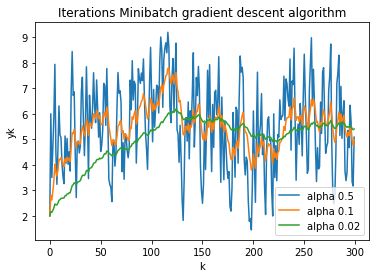

In [13]:
#Question 4

a = [0.5, 0.1, 0.02]
n = 10
borne_inf = 1; borne_sup = n; nb_iter = 300
I = npr.randint(borne_inf, borne_sup+1, nb_iter)
ia = []
x = np.linspace(1,10,10)
y0 = 2
for alpha in a :
    y_k = np.zeros(nb_iter); y_k[0] = y0
    for k in range(1, nb_iter): #minibatch gradient descent algorithm
        y_k[k] = y_k[k-1] - alpha*(y_k[k-1]-x[I[k-1]-1])
    ia+=[y_k]
    

plt.plot(range(0, nb_iter), ia[0], label = "alpha {}".format(a[0]))
plt.plot(range(0, nb_iter), ia[1], label = "alpha {}".format(a[1]))
plt.plot(range(0, nb_iter), ia[2], label = "alpha {}".format(a[2]))
plt.title("Iterations Minibatch gradient descent algorithm")
plt.xlabel("k")
plt.ylabel("yk")
plt.legend()
plt.show()

**Commentaires :** L'algorithme est très sensible au pas. Plus le pas est grand, plus l'algorithme semble osciller autour de l'argmin sans forcément l'atteindre. Il est différent par rapport à l'algorithme classique de descente de gradient, dans le sens où l'algorithme de descente de gradient va atteindre un minimum (parfois local), alors que cet algorithme va seulement osciller autour du minimum. L'avantage est que cet algorithme ne restera pas bloqué dans un minimum local.

**Question 5:** Try the same algorithm with a step size of the form $\alpha_k = 1 / (k+1)$ for all $k$. Represent three runs of the algorithm on the same graph with 1000 iterations. Comments the results. 

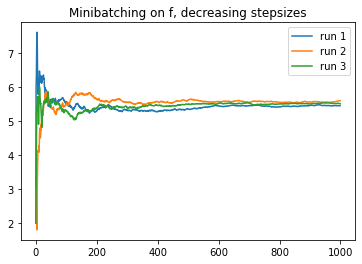

In [14]:
a = [0.5, 0.1, 0.02]
n = 10
borne_inf = 1; borne_sup = n; nb_iter = 1000
ia = []
x = np.linspace(1,10,10)
y0 = 2
it= 0
while it < 3 :
    I = npr.randint(borne_inf, borne_sup+1, nb_iter)
    y_k = np.zeros(nb_iter); y_k[0] = y0
    for k in range(1, nb_iter): #minibatch gradient descent algorithm
        y_k[k] = y_k[k-1] - (1/(k+1))*(y_k[k-1]-x[I[k-1]-1])
    ia+=[y_k]
    it+= 1
    

plt.plot(range(0, nb_iter), ia[0], label = "run 1")
plt.plot(range(0, nb_iter), ia[1], label = "run 2")
plt.plot(range(0, nb_iter), ia[2], label = "run 3")
plt.title("Minibatching on f, decreasing stepsizes")
plt.legend()
plt.show()

**Commentaires :**  Avec un pas décroissant, l'algorithme semble moins oscillé qu'avec un pas constant et ainsi mieux converger vers le minimum.

**Question 6:** Experiment with different step size regimes. Which conclusions can you make regarding these experiments? Comment on the sensitivity of the minibatch strategy to step sizes. Is the proposed minibatching strategy a good algorithm to estimate the mean? In which situation would it be favorable to use this strategy?

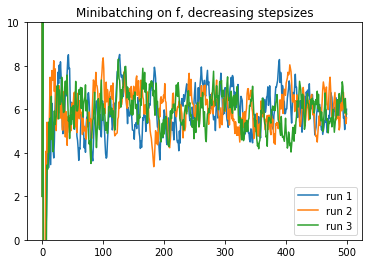

In [15]:
a = [0.5, 0.1, 0.02]
n = 10
borne_inf = 1; borne_sup = n; nb_iter = 500                   #avec un pas de la forme 1/log(k)
ia = []
x = np.linspace(1,10,10)
y0 = 2
it= 0
while it < 3 :
    I = npr.randint(borne_inf, borne_sup, nb_iter)
    y_k = np.zeros(nb_iter); y_k[0] = y0
    for k in range(1, nb_iter): #minibatch gradient descent algorithm
        y_k[k] = y_k[k-1] - (1/np.log(k+0.001))*(y_k[k-1]-x[I[k-1]])
    ia+=[y_k]
    it+= 1
    
figure = plt.figure()
axes = figure.add_subplot(111)
axes.set_ylim(0, 10)
plt.plot(range(0, nb_iter), ia[0], label = "run 1")
plt.plot(range(0, nb_iter), ia[1], label = "run 2")
plt.plot(range(0, nb_iter), ia[2], label = "run 3")
plt.title("Minibatching on f, decreasing stepsizes")
plt.legend()
plt.show()


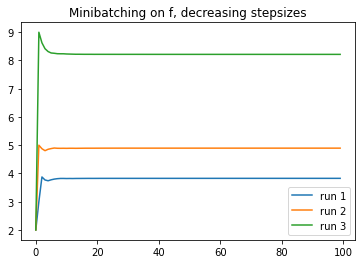

In [16]:
a = [0.5, 0.1, 0.02]
n = 10
borne_inf = 1; borne_sup = n; nb_iter = 100
ia = []
x = np.linspace(1,10,10)
y0 = 2
it= 0
while it < 3 :
    I = npr.randint(borne_inf, borne_sup+1, nb_iter)
    y_k = np.zeros(nb_iter); y_k[0] = y0
    for k in range(1, nb_iter): #minibatch gradient descent algorithm             avec un pas de la forme (1/k^3)
        y_k[k] = y_k[k-1] - (1/(k**3))*(y_k[k-1]-x[I[k-1]-1])
    ia+=[y_k]
    it+= 1
    

plt.plot(range(0, nb_iter), ia[0], label = "run 1")
plt.plot(range(0, nb_iter), ia[1], label = "run 2")
plt.plot(range(0, nb_iter), ia[2], label = "run 3")
plt.title("Minibatching on f, decreasing stepsizes")
plt.legend()
plt.show()

**Commentaires :** Cet algorithme semble très sensible à la taille des pas, pour avoir une bonne convergence il faut trouver la bonne suite de pas $\alpha_k$. Ainsi, il semblerait que ce ne soit pas un bon algorithme pour estimer la moyenne. Par contre il serait judicieux d'utiliser cet algorithme lorsque la taille du dataset est grande et qu'une descente de gradient normale prendrait trop de temps de calcul.

## Exercice 2: single layer perceptron (1957)

The following code provides a two label dataset in $\mathbb{R}^2$: $x_1,\ldots, x_n$ is a set of $n$ vectors in $\mathbb{R}^2$ and $y_1,\ldots,y_n$ are the corresponding labels ($-1$ or $1$). 

$X$ is a table of size $n \times 2$ and $y$ is a vector of labels of size $n$ (0 or 1). We also provide functions which allow to plot data and plot a line which equation is given by 
$$w^Tx + b = 0$$
for a vector $w \in \mathbb{R}^2$ and a bias term $b \in \mathbb{R}$.

In [17]:
## Generate data
n = 200
angles = 2 * math.pi * npr.rand(n) - math.pi / 4
radii = npr.rand(n) * 0.4 + 0.8
x1 = radii * np.cos(angles)
x2 = radii * np.sin(angles)
X = np.vstack((x1,x2)).transpose()
y = 1. * (angles > 3*math.pi/4) * 2 - 1

temp = y==-1.
X[temp,0] = X[temp,0] - 1
X[temp,1] = X[temp,1] + 0.5

## Functions for plots
def addline(w, b, label, xlim = (-2,1), ylim = (-1,2)):
    ## Adds a line to a plot
    if abs(w[1]) < 1e-3:
        ytemp = np.arange(ylim[0] * 100, ylim[1] * 100) / 100
        xtemp = - ytemp * w[1] / w[0] - b / w[0]
        tempSelect1 = (xtemp < xlim[1]) * (xtemp > xlim[0])
        tempSelect2 = (ytemp < ylim[1]) * (ytemp > ylim[0])
        xtemp = xtemp[tempSelect1 * tempSelect2]
        ytemp = ytemp[tempSelect1 * tempSelect2]
        plt.plot(xtemp, ytemp, label = label)
        plt.legend()
        
    else:
        xtemp = np.arange(xlim[0] * 100, xlim[1] * 100) / 100
        ytemp = - xtemp * w[0] / w[1] - b / w[1]
        tempSelect1 = (xtemp < xlim[1]) * (xtemp > xlim[0])
        tempSelect2 = (ytemp < ylim[1]) * (ytemp > ylim[0])
        xtemp = xtemp[tempSelect1 * tempSelect2]
        ytemp = ytemp[tempSelect1 * tempSelect2]
        plt.plot(xtemp, ytemp, label = label)
        plt.legend()


def plotData(X,y):
    ## Plot data
    for k in (-1,1):
        temp = y==k
        plt.plot(X[temp,0], X[temp,1], '.', label = k)

    plt.legend()
    plt.axis('equal')

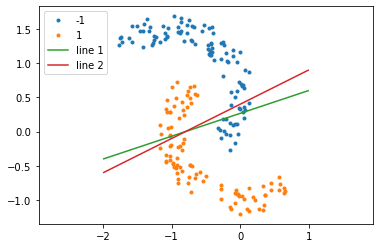

In [18]:
## Example of usage

plotData(X,y)
addline((1,-3), 0.8, "line 1")
addline((1,-2), 0.8, "line 2")


In [19]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


The perceptron algorithm aims at building a classifier of the form
\begin{align*}
    f_{w,b} \colon x \mapsto \mathrm{sign}(w^Tx + b)
\end{align*}
where $w \in \mathbb{R}^2$ and $b \in \mathbb{R}$ are weights and bias parameters.
The perceptron learning algorithm goes as follows: start with $w_0 \in \mathbb{R}^2$, $b_0 \in \mathbb{R}$ and iterate for $k \in \mathbb{N}$:
\begin{align*}
    &I_k  \sim U(\{1,\ldots, n\})\\
    &\begin{cases}
            w_{k+1} &= w_k + \alpha y_{I_k} x_{I_k} \qquad &b_{k+1} = b_k + \alpha y_{I_k}  \qquad &\text{ if } (w^Tx_{I_k}+b) y_{I_k} < 0 \\
        w_{k+1} &= w_k  \qquad &b_{k+1} = b_k  \qquad &\text{ otherwise }
    \end{cases}
\end{align*}
where $\alpha$ is a step parameter.

**Question 7:** Implement the algorithm and plot the data as well as the decision boundary given by the final iterate. Use the following parameters
* initialize weights $w$ and bias $b$ to be equal to $1$
* 500 iterations
* $\alpha_k = 1$ for all $k$.

Plot data and the decision boundary corresponding to 5 different runs on the same picture. Print also the value of the bias and weight vector at the last iteration.

In [20]:
def perceptron(n,nb_iter,alpha,W0,b0)  :
    run_w= []
    run_b = []
    borne_inf = 1; borne_sup = n;
    for i in range(0, 5) :
        W=W0
        b =b0
        I = npr.randint(borne_inf, borne_sup, nb_iter)
        for k in range( nb_iter): #perceptron learning algorithm
            if (np.dot(W, X[I[k]]) + b)*y[I[k]] < 0: 
                W = W + alpha[k]*(y[I[k]]*X[I[k]])
                b = b + alpha[k]*y[I[k]]
            else : 
                W = W
                b = b
        run_w += [W]; run_b+= [b]
        print("run {}, weight = {} bias = {}".format(i, W, b))


    plotData(X,y)
    addline(tuple(run_w[0]), run_b[0], "run 0")
    addline(tuple(run_w[1]), run_b[1], "run 1")
    addline(tuple(run_w[2]), run_b[2], "run 2")
    addline(tuple(run_w[3]), run_b[3], "run 3")
    addline(tuple(run_w[4]), run_b[4], "run 4")
    plt.title("Five runs of the perceptron algorithm")
    plt.legend()
    plt.show()

run 0, weight = [-3.13155194 -3.73635168] bias = 0.0
run 1, weight = [-3.00195391 -4.10559327] bias = -1.0
run 2, weight = [-2.27088105 -4.36829658] bias = -1.0
run 3, weight = [-4.3327673  -2.33476057] bias = -1.0
run 4, weight = [-2.1454217  -3.95476235] bias = -1.0


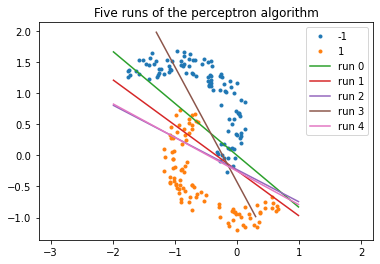

In [21]:
n= 200
nb_iter = 500
W= np.array([1,1])
b=1
alpha = [1]* nb_iter


perceptron(n,nb_iter,alpha,W,b)

**Question 8:** What happens if you increase the number of iterations or change the step size? Can you explain what you observe? Does the algorithm seem to converge?

run 0, weight = [-5.19694416 -5.29686486] bias = 0.0
run 1, weight = [-5.00551039 -5.72420706] bias = 0.0
run 2, weight = [-4.79380592 -4.79353653] bias = -1.0
run 3, weight = [-5.47223474 -6.3714843 ] bias = -1.0
run 4, weight = [-4.63319334 -5.09946654] bias = -1.0


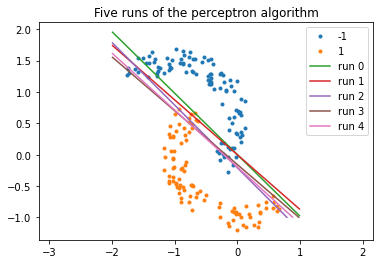

In [22]:
n= 200
nb_iter = 100000
W= np.array([1,1])                       #more iterations
b=1
alpha = [1]* nb_iter

perceptron(n,nb_iter,alpha,W,b)

run 0, weight = [-0.30189784 -0.393028  ] bias = 1.3877787807814457e-16
run 1, weight = [-0.32200342 -0.42738465] bias = 1.3877787807814457e-16
run 2, weight = [-0.32413978 -0.40935312] bias = -0.09999999999999987
run 3, weight = [-0.15289316 -0.33727578] bias = 0.10000000000000014
run 4, weight = [-0.3333835  -0.46561567] bias = 1.3877787807814457e-16


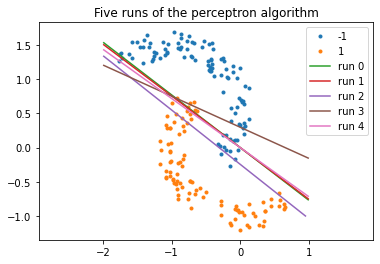

In [23]:
n= 200
nb_iter = 500                         #reduce the step size
W= np.array([1,1])
b=1
alpha = [0.1] * nb_iter

perceptron(n,nb_iter,alpha,W,b)

run 0, weight = [ 0.44648057 -0.30719977] bias = 0.48999999999999955
run 1, weight = [ 0.47651273 -0.39616507] bias = 0.37999999999999945
run 2, weight = [ 0.41572224 -0.31465885] bias = 0.4399999999999995
run 3, weight = [ 0.50772863 -0.34497937] bias = 0.4399999999999995
run 4, weight = [ 0.44563845 -0.30872997] bias = 0.4199999999999995


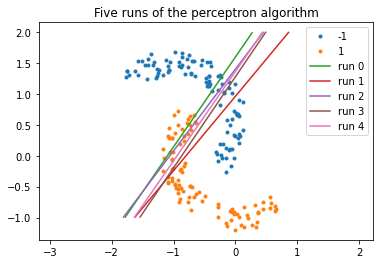

In [24]:
n= 200
nb_iter = 500
W= np.array([1,1])                  #increase the step size
b=1
alpha = [0.01] * nb_iter

perceptron(n,nb_iter,alpha,W,b)

run 0, weight = [ -7.63161397 -24.74115974] bias = -9.0
run 1, weight = [-12.26864568 -18.46129216] bias = 1.0
run 2, weight = [-13.14850111 -20.35198652] bias = 1.0
run 3, weight = [-17.09638478 -17.82299413] bias = -4.0
run 4, weight = [-15.16574114 -27.13378319] bias = 1.0


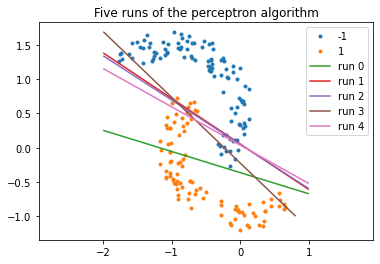

In [25]:
n= 200
nb_iter = 500
W= np.array([1,1])
b=1
alpha = [5] * nb_iter

perceptron(n,nb_iter,alpha,W,b)

run 0, weight = [-139.22101527 -235.32294117] bias = -49.0
run 1, weight = [-175.79076336 -234.64835926] bias = 1.0
run 2, weight = [ -93.06325029 -232.48624104] bias = 1.0
run 3, weight = [ -76.74965554 -237.74660574] bias = -49.0
run 4, weight = [-166.28411577 -174.60571346] bias = 1.0


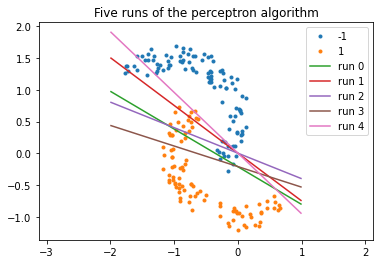

In [26]:
n= 200
nb_iter = 500
W= np.array([1,1])
b=1
alpha = [50] * nb_iter

perceptron(n,nb_iter,alpha,W,b)

**Commentaires :** L'algorithme du perceptron semble très sensible à la suite de pas, également on observe beaucoup de variance entre les différents run de l'algorithme et la convergence semble limitée. L'algorithme du perceptron n'est pas stable et possède beaucoup de défauts.

**Question 9:** consider a sequence of step sizes of the form $\alpha_k = 1 / \sqrt{k+1}$ for all $k$? What happens when the number of iteration increases say to $4000$, or $40000$?

run 0, weight = [-0.17625952 -0.17168099] bias = -0.03069871303905489
run 1, weight = [-0.14768263 -0.14925776] bias = -0.017545984502180253
run 2, weight = [-0.32109924 -0.34202399] bias = -0.07175701587442229
run 3, weight = [-0.11842919 -0.11831828] bias = -0.005697777174121895
run 4, weight = [-0.14654319 -0.15722305] bias = -0.022638256279543325


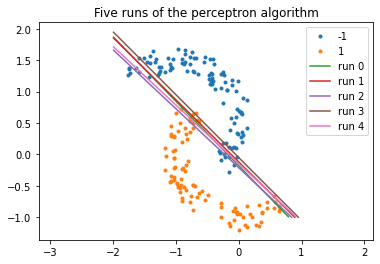

In [27]:
n= 200
nb_iter = 4000
W= np.array([1,1])
b=1
alpha = [1/(np.sqrt(k+1)) for k in range(nb_iter)]

perceptron(n,nb_iter,alpha,W,b)


run 0, weight = [-0.02263655 -0.02994211] bias = -0.0006489209486528081
run 1, weight = [-0.01662909 -0.03094948] bias = -0.007543474609218561
run 2, weight = [-0.01400553 -0.02748139] bias = -0.010778821146618066
run 3, weight = [-0.0141612  -0.02755195] bias = -0.007489053900187755
run 4, weight = [-0.02248517 -0.0308613 ] bias = 0.0005880332564336815


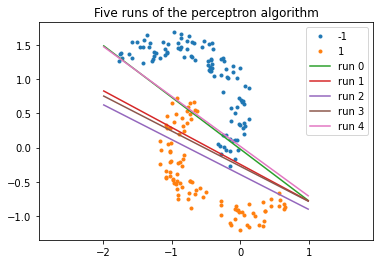

In [28]:
n= 200
nb_iter = 40000
W= np.array([1,1])
b=1
alpha = [1/(np.sqrt(k+1)) for k in range(nb_iter)]

perceptron(n,nb_iter,alpha,W,b)

**Commentaires :** Avec la suite de pas $\alpha_k = 1 / \sqrt{k+1}$, on observe une meilleure convergence vers les minimums de w et de b qui valent 0 et si on augmente le nombre d'itérations à 40000, on observe moins de variance par rapport aux paramètres w et b mais plus de variance sur l'hyperplan séparateur.

The perceptron algorithm attempts to minimize the following loss function 
\begin{align*}
    (perceptron) \qquad \min_{w,b} \frac{1}{n} \sum_{i=1}^n l_{\mathrm{perceptron}}(w^T x_i + b, y_i)
\end{align*}
where $l_{\mathrm{perceptron}}(s,y) = \max\{0, -ys\}$ for all $s$. It is actually a (sub)gradient method exactly of the same kind as what we have used in Exercise 1.

**Question 9:** Try to explain the preceeding algorithm in light of these elements. What is the solution to this minimization problem? Does it explain the behaviour observed in your experiments? Try to understand in which sense the algorithm is performing (sub)gradient descent, you may think about the loss function $l_{\mathrm{perceptron}}$ to be piecewise differentiable.

**Answer :** Le minimum de la fonction coût de l'algorithme du perceptron possède une solution triviale qui vaut 0 et qui est atteint pour w = b = 0, de plus la fonction est homogène. Cela explique le fait que cet algorithme donne d'assez mauvais résultats et n'est pas très robuste. Il faudrait rajouter une pénalisation à la fonction coût.

La fonction coût est convexe mais non différentiable(à cause de la fonction max), cependant elle possède un sous-gradient dans le sens où elle est différentiable par morceaux, il faut alors regarder la condition liée à la fonction $ l_{\mathrm{perceptron}} $
 - si $(w^Tx_{I}+b) y_{I} < 0$, alors $\nabla _w f_i = -y_ix_i$ et $\nabla _b f_i = -y_i$ 
 - sinon $\nabla _w f = \nabla _b f = 0$

Ainsi, dans l'algo SGD, on update les paramètres w et b que dans le premier cas.

## Exercise 3: Support Vector Machine
Make sure that you finish exercise 2 before starting this one.


The support vector machine is given by the solution of
\begin{align*}
    (SVM) \qquad \min_{w,b} C \sum_{i=1}^n l_{\mathrm{SVM}}(w^T x_i + b, y_i) + \frac{1}{2} \|w\|^2 
\end{align*}
where $l_{\mathrm{SVM}}(s,y) = \max\{0,1 -ys\}$ for all $s$.
The purpose of this section is to derive an algorithm following similar ideas as the perceptron to find a solution for the SVM problem. 



**Question 10:** use [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from `scikit-learn` library to solve the SVM problem for $C=1/10$. The kernel should be `'linear'`. Provide the value for the weight and intercept solutions. What happens if you change the value of $C$?




**Answer :** Le paramètre $C$ est un paramètre de régularisation, plus le $C$ est grand, plus l'hyperplan aura une petite marge, c'est à dire qu'on aura très peu de mauvaise classification sur le training set, et plus le $C$ est petit, plus l'hyperplan aura une grande marge.

In [29]:
from sklearn.svm import SVC


In [30]:
C = 1/10
clf1 = SVC(C=C, kernel='linear')
clf1.fit(X,y)
w1 = clf1.coef_
b1 = clf1.intercept_
print("C = ", C, "\n Weights :", w1, "\n Intercept : ", b1)

C =  0.1 
 Weights : [[-0.70320544 -1.49488317]] 
 Intercept :  [0.04038403]


In [31]:
C = 5/10
clf2 = SVC(C=C, kernel='linear')
clf2.fit(X,y)
w2 = clf2.coef_
b2 = clf2.intercept_
print("C = ", C, "\n Weights :", w2, "\n Intercept : ", b2)

C =  0.5 
 Weights : [[-1.41749306 -2.3038225 ]] 
 Intercept :  [-0.15231437]


In [32]:
C = 1/100
clf3 = SVC(C=C, kernel='linear')
clf3.fit(X,y)
w3 = clf3.coef_
b3 = clf3.intercept_
print("C = ", C, "\n Weights :", w3, "\n Intercept : ", b3)

C =  0.01 
 Weights : [[-0.10182349 -0.89422989]] 
 Intercept :  [0.1810497]


In [33]:
C = 1
clf4 = SVC(C=C, kernel='linear')
clf4.fit(X,y)
w4 = clf4.coef_
b4 = clf4.intercept_
print("C = ", C, "\n Weights :", w4, "\n Intercept : ", b4)

C =  1 
 Weights : [[-1.8229433  -2.72893039]] 
 Intercept :  [-0.14019905]


In [34]:
C = 5
clf5 = SVC(C=C, kernel='linear')
clf5.fit(X,y)
w5 = clf5.coef_
b5 = clf5.intercept_
print("C = ", C, "\n Weights :", w5, "\n Intercept : ", b5)

C =  5 
 Weights : [[-2.91719711 -3.91602288]] 
 Intercept :  [-0.45813218]


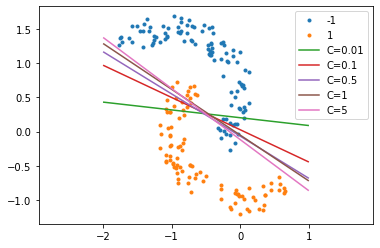

In [35]:


plotData(X,y)
addline(w3.T,b3, "C=0.01")
addline(w1.T,b1, "C=0.1")
addline(w2.T,b2, "C=0.5")
addline(w4.T,b4, "C=1")
addline(w5.T,b5, "C=5")

**Question 11:** We are going to consider an intermediate problem which is simpler than the SVM problem. Consider the unregularized SVM
\begin{align*}
    (pseudo-SVM) \qquad \min_{w,b} \frac{1}{n}\sum_{i=1}^n l_{\mathrm{SVM}}(w^T x_i + b, y_i)
\end{align*}
By analogy with the perceptron (the loss is almost the same), derive an algorithm to solve this problem. Perform the same experiment as what you did with the perceptron, using the following parameters
* initialize weights $w$ and bias $b$ to be equal to $0$
* 1000 iterations
* $\alpha_k = 1 / \sqrt{1+k}$ for all $k$.

What happens? What is the difference with the perceptron? Comment on the importance of the loss function.

**Answer :** Par rapport à l'algorithme du perceptron, seule la condition correspondant à la fonction $l_{\mathrm{SVM}}$ sera modifiée. On regardera alors la condition suivante : $(w^Tx_{I}+b) y_{I} < 1$.Il est important de bien choisir la fonction coût, en effet ici, le problème d'optimisation associé ne possède pas de solution triviale, ainsi l'algorithme sera plus stable.

In [36]:
def pseudo_svm(n,nb_iter,alpha,W0,b0)  :
    run_w= []
    run_b = []
    borne_inf = 1; borne_sup = n;
    for i in range(0, 5) :
        W=W0
        b =b0
        I = npr.randint(borne_inf, borne_sup, nb_iter)
        for k in range( nb_iter):
            if 1-((np.dot(W, X[I[k]]) + b)*y[I[k]]) > 0: 
                W = W + alpha[k]*(y[I[k]]*X[I[k]])
                b = b + alpha[k]*y[I[k]]
            else : 
                W = W
                b = b
        run_w += [W]; run_b+= [b]
        print("run {}, weight = {} bias = {}".format(i, W, b))

        

    plotData(X,y)
    addline(tuple(run_w[0]), run_b[0], "run 0")
    addline(tuple(run_w[1]), run_b[1], "run 1")
    addline(tuple(run_w[2]), run_b[2], "run 2")
    addline(tuple(run_w[3]), run_b[3], "run 3")
    addline(tuple(run_w[4]), run_b[4], "run 4")
    plt.title("Five runs of the pseudo-SVM algorithm")
    plt.legend()
    plt.show()

run 0, weight = [-1.74324992 -2.77954815] bias = -0.19686997509222148
run 1, weight = [-1.94427833 -2.74548741] bias = -0.1060365831830078
run 2, weight = [-1.93770661 -2.92896764] bias = -0.06507971644068458
run 3, weight = [-2.00136227 -2.82301186] bias = -0.2051283566577868
run 4, weight = [-1.87447353 -2.72797018] bias = -0.2797735818242666


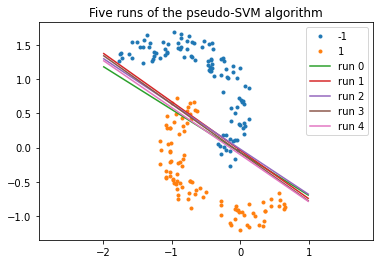

In [37]:
n= 200
nb_iter = 1000
W= np.array([0,0])
b=0
alpha = [1/(np.sqrt(k+1)) for k in range(nb_iter)]

pseudo_svm(n,nb_iter,alpha,W,b)

**Commentaires :** Par rapport à l'algorithme du perceptron, on observe moins de variance dans les différents run pour les valeurs de w, de b et de l'hyperplan séparateur. L'algorithme est donc plus stable. Cependant les paramètres varient encore un peu, c'est pourquoi il est important de régulariser la fonction coût. 

**Question 12:** Based on the previous question, devise an algorithm for the $(SVM)$ problem. This should be based on the response of question 11 with the idea that $(SVM)$ is a linear combination between the loss of $(pseudo-SVM)$ and the $L^2$ norm which gradient you know, with scaling factors $Cn$ and $1/2$. Reproduce the preceeding experiment with the following setting
* initialize weights $w$ and bias $b$ to be equal to $0$
* 10000 iterations
* $\alpha_k = 1 / (50 + k)$ for all $k$.

Which difference do you notice? Can you explain it?

**Answer :** Pour le SVM, la fonction à minimiser est la fonction f suivante :  $$ C \sum_{i=1}^n \max(0,1-y_i(wx_i +b)) + \frac{1}{2} \|w\|^2 $$ $$= \frac 12 \|w\|^2 +Cn  f_{\mathrm{pseudo-SVM}} $$ Comme précdemment cette fonction est convexe et différentiable par morceaux comme combinaison linéaire de la fonction coût pseudo-SVM et de la norme $L^2$. Par rapport à l'algorithme pseudo-SVM, la condition à vérifier reste la même cependant la formule pour update les paramètres w et b change du fait que les gradients changent. On a alors :
 - si $(w^Tx_{I}+b) y_{I} < 1$, alors $\nabla _w f_i = -Cny_ix_i+w$ et $\nabla _b f_i = -Cny_i$ 
 - sinon $\nabla _w f = w,  \nabla _b f = 0$
 
 On peut alors modifier l'algorithme en conséquence.


In [38]:
def SVM(C,n,nb_iter,alpha,W0,b0)  :
    run_w= []
    run_b = []
    borne_inf = 1; borne_sup = n;
    for i in range(0, 5) :
        W=W0
        b =b0
        I = npr.randint(borne_inf, borne_sup, nb_iter)
        for k in range( nb_iter):
            if 1-((np.dot(W, X[I[k]]) + b)*y[I[k]]) > 0: 
                W = W + alpha[k]*(C*n*y[I[k]]*X[I[k]]-W)
                b = b + alpha[k]*(C*n*y[I[k]])
            else : 
                W = W - alpha[k]*W
                b = b 
        run_w += [W]; run_b+= [b]
        print("run {}, weight = {} bias = {}".format(i, W, b))

        

    plotData(X,y)
    addline(tuple(run_w[0]), run_b[0], "run 0")
    addline(tuple(run_w[1]), run_b[1], "run 1")
    addline(tuple(run_w[2]), run_b[2], "run 2")
    addline(tuple(run_w[3]), run_b[3], "run 3")
    addline(tuple(run_w[4]), run_b[4], "run 4")
    plt.title("Five runs of the SVM algorithm")
    plt.legend()
    plt.show()

run 0, weight = [-0.69737298 -1.51195803] bias = 0.017135666009446094
run 1, weight = [-0.69632744 -1.49474862] bias = 0.0071321269130806934
run 2, weight = [-0.75190288 -1.48709703] bias = 0.04028442311093732
run 3, weight = [-0.66499562 -1.50013833] bias = 0.04170319649031109
run 4, weight = [-0.72316479 -1.48493395] bias = 0.02136347841718777


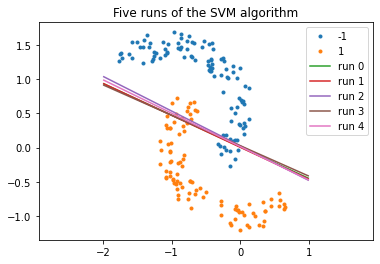

In [39]:
C= 0.1
n= 200
nb_iter = 10000
W= np.array([0,0])
b=0
alpha = [1/(50+k) for k in range(nb_iter)]

SVM(C,n,nb_iter,alpha,W,b)

**Commentaires :** L'algorithme est bien plus stable que le pseudo-svm, en effet on observe très peu de variance sur les différents run pour les valeurs de w, b et de l'hyperplan séparateur, ceci s'explique grâce à la régularisation $L^2$ et du paramètre $C$.

**Question 13:** Consider the previous experiment, for a single run, plot the distance between the current iterate and the solution given by `scikit-learn` in logarithmic scale. Plot data points should be computed every 100 iterates.

Pour calculer la distance, on utilise la formule suivante : $$\sqrt {(w_i[0]-w_{SL}[0])^2+(w_i[1]-w_{SL}[1])^2+(b_i-b_{SL})^2}$$

In [40]:
from sklearn.svm import SVC
C = 1
clf = SVC(C=C, kernel='linear')
clf.fit(X,y)
w_real = clf.coef_
b_real = clf.intercept_
print("C = ", C, "\n Weights :", w_real, "\n Intercept : ", b)

C =  1 
 Weights : [[-1.8229433  -2.72893039]] 
 Intercept :  0


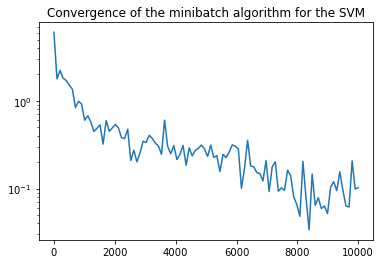

In [41]:
C= 1
n= 200
nb_iter = 10000
W= np.array([0,0])
b=0
alpha = [1/(50+k) for k in range(nb_iter)]
dist = []
I = npr.randint(0, 200, nb_iter)
for k in range( nb_iter):
    if 1-((np.dot(W, X[I[k]]) + b)*y[I[k]]) > 0: 
        W = W + alpha[k]*(C*n*y[I[k]]*X[I[k]]-W)
        b = b + alpha[k]*(C*n*y[I[k]])
    else : 
        W = W - alpha[k]*W
        b = b 
    if ((k%100)==0):
        dist+=[np.sqrt((W[0]-w_real[0][0])**2+(W[1]-w_real[0][1])**2+(b-b_real)**2)]

A = np.linspace(0,nb_iter,100)    
plt.plot(A,dist)
plt.yscale("log")
plt.title("Convergence of the minibatch algorithm for the SVM")
plt.show()

**Commentaires :** On observe une tendance des itérés qui semblent converger vers la solution de `scikit-learn`, cependant cette convergence n'est pas linéaire.

**Question 14:** Given $S_k = \frac1k \sum_{i=1}^k w_i$ and $w_{k+1}$, find a simple formula for $S_{k+1} = \frac{1}{k+1} \sum_{i=1}^{k+1} w_i$ without recomputing the sum.


**Answer :**$$S_{k+1} = \frac {k}{k+1} S_k + \frac {1}{k+1} w_{k+1} $$ 

Consider the previous experiment, but instead of $w_k$ and $b_k$ use the averages over all previously seen iterations:
\begin{align*}
    \bar{w}_k = \frac{1}{k} \sum_{i=1}^k w_i \\
    \bar{b}_k = \frac{1}{k} \sum_{i=1}^k b_i \\
\end{align*}
What is the effect of averaging? Use step size $\alpha_k = 0.1 / (500 +  \sqrt{k})$ for all $k$. What do you observe?




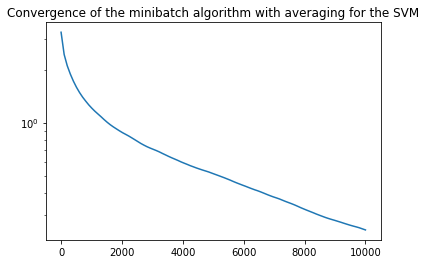

In [42]:
C= 1
n= 200
nb_iter = 10000
W= np.array([0,0])
b=0
alpha = [0.1/(500+np.sqrt(k)) for k in range(nb_iter)]
dist = []
I = npr.randint(0, 200, nb_iter)
W_mean =  W
b_mean = b
for k in range( nb_iter):
    if 1-((np.dot(W, X[I[k]]) + b)*y[I[k]]) > 0: 
        W = W + alpha[k]*(C*n*y[I[k]]*X[I[k]]-W)
        b = b + alpha[k]*(C*n*y[I[k]])
    else : 
        W = W - alpha[k]*W
        b = b 
    W_mean = (k+1)/(k+2) * W_mean + 1/(k+2)*W
    b_mean = (k+1)/(k+2) * b_mean + 1/(k+2)*b
    
    if ((k%100)==0):
        dist+=[np.sqrt((W_mean[0]-w_real[0][0])**2+(W_mean[1]-w_real[0][1])**2+(b_mean-b_real)**2)]

A = np.linspace(0,nb_iter,100)    
plt.plot(A,dist)
plt.yscale("log")
plt.title("Convergence of the minibatch algorithm with averaging for the SVM")
plt.show()

**Commentaires :** Le moyennage du pas permet d'avoir une convergence plus lisse et linéaire vers la solution de `scikit-learn`

## Exercice 4: Back to the perceptron.

**Bonus question:** Getting back to the perceptron algorithm, run the algorithm with the following parameters
* initialize weights $w$ and bias $b$ to be equal to $1$
* 100000 iterations
* $\alpha_k = 10 / (10 + k)$ for all $k$.

Represent $5$ runs of the algorithm. What do you observe? In which sense does the algorithm seem to converge? If you can find a consistent explaination with a correct mathematical proof, I invite you to the restaurant.

run 0, weight = [-0.50457014 -0.55618475] bias = -0.12120900266200216
run 1, weight = [-0.66092769 -0.72657399] bias = -0.1615524457833322
run 2, weight = [-0.28107381 -0.30906666] bias = -0.06870292828486678
run 3, weight = [-0.35004192 -0.3884698 ] bias = -0.08570186739633001
run 4, weight = [-0.34488095 -0.37911128] bias = -0.0865989380567983


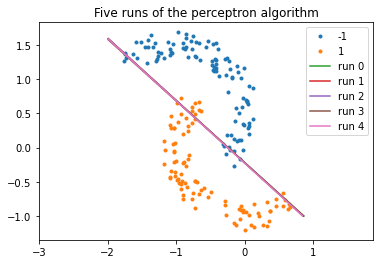

In [43]:
n= 200
nb_iter = 100000
W= np.array([1,1])
b=1
alpha = [10/(10+k) for k in range(nb_iter)] 

perceptron(n,nb_iter,alpha,W,b)

**Commentaires :** Avec la suite de pas $\alpha_k = 10 / (10 + k)$, l'hyperplan semble converger vers un même hyperplan, cependant on observe de la variance sur le w et le b. Ce qui signifie que l'algorithme ne converge pas dans le sens des paramètres w et b mais dans le sens de l'hyperplan séparateur. Comment expliquer cela ?